<a href="https://colab.research.google.com/github/ENRICOROBLESDELRIO/data_boot_camp_final_project/blob/raquel_branch/Analysis_Raquel_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade -q pygsheets

     |████████████████████████████████| 147 kB 5.1 MB/s 


# **Database set up**



In [2]:
# Libraries and dependencies

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from google.colab import files
from sqlalchemy import create_engine
import psycopg2


# Import for models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
# Google Cloud SQL connexion:
# Code taken from: https://stackoverflow.com/questions/53180140/how-to-access-cloud-sql-from-google-colab
!gcloud auth login
!gcloud config set project endeavor-intelligence-unit
!gcloud sql instances describe finalprojectdb

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=9zqu9i8PfTkp56KqzOTW02jqVGH577&prompt=consent&access_type=offline&code_challenge=gbVKbtSof6vV3IaMYi11voGcIM-QHeayWel9h9N1zDE&code_challenge_method=S256

Enter verification code: 4/1AX4XfWhXWVEu0jO88PfxZ1z7DYEvqz8GBxS78PP3X713pPZsTh2qDyRrJxI

You are now logged in as [racvbs@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID
Updated property [core/project].
ERROR: (gcloud.sql.instances.describe) There was no instance 

In [4]:
# download and initialize the psql proxy
!wget https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64 -O cloud_sql_proxy
!chmod +x cloud_sql_proxy

# "connectionName" is from the previous block
!nohup ./cloud_sql_proxy -instances="endeavor-intelligence-unit:northamerica-northeast2:finalprojectdb"=tcp:5432 &
!sleep 30s

--2021-11-12 00:23:47--  https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64
Resolving dl.google.com (dl.google.com)... 74.125.202.190, 74.125.202.136, 74.125.202.91, ...
Connecting to dl.google.com (dl.google.com)|74.125.202.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16638816 (16M) [application/octet-stream]
Saving to: ‘cloud_sql_proxy’

cloud_sql_proxy     100%[===================>]  15.87M  --.-KB/s    in 0.08s   

2021-11-12 00:23:47 (202 MB/s) - ‘cloud_sql_proxy’ saved [16638816/16638816]

nohup: appending output to 'nohup.out'


In [5]:
#Checking the proxy´s logs 
!cat nohup.out

2021/11/12 00:23:47 current FDs rlimit set to 1048576, wanted limit is 8500. Nothing to do here.
2021/11/12 00:23:49 errors parsing config:
	googleapi: Error 403: The client is not authorized to make this request., notAuthorized


In [7]:
# Connection to protect access and users to the database: 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Connection to the file with user and access to the database: 

from google.colab import files

with open('/content/drive/MyDrive/Final_project/Second_Deliverable/key_config.txt', "r") as file:
    FileasList = file.readlines()
    username = FileasList[0]
    password = FileasList[1]

    new_line = []
    # Loop through the file
    for i in FileasList:
        # Get rid of any new lines ("enter")
        i = i.replace("\n", "")
        # Add the cleaned data to the new_line list
        new_line.append(i)
    # Set the username to be the first object
    username = new_line[0]
    # Set the password to be the second object
    password = new_line[1]
    # Set the host to be the third object
    host = new_line[2]
    # Set the port to be the four object
    port = new_line[3]
    # Set the database to be the five object
    database = new_line[4]

In [9]:
# Connexion throught psycopg2 Google Cloud SQL data base

conn = psycopg2.connect(
    host=host, port=port, database=database,
    user=username, password=password)

# **Founders cleaning**


**Libraries**


In [10]:

# Libraries and dependencies

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from google.colab import files

## Import for models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [11]:
# Query to connect with SQL data base from Founders Demographics 
SQL_Query = pd.read_sql_query('''select * FROM "Founders" ''', conn)
founders_df = pd.DataFrame(SQL_Query)
founders_df.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0


In [12]:
# data types
founders_df.dtypes

id_founder                               int64
id_company                               int64
general_location                        object
manager_exp                              int64
clevel_exp                               int64
engineering_exp                          int64
sales_exp                                int64
finance_exp                              int64
human_capital_exp                        int64
consulting_exp                           int64
founder_exp                            float64
foundation_year                        float64
years_of_experience_as_entreprenuer    float64
age_of_first_entrepreneurship          float64
age                                    float64
years_of_experience                    float64
number_of_startups                       int64
gender                                  object
foreing_studies                          int64
foreing_work_experience                  int64
foreing_founder                          int64
dtype: object

In [13]:
founders_df.count()

id_founder                             640
id_company                             640
general_location                       629
manager_exp                            640
clevel_exp                             640
engineering_exp                        640
sales_exp                              640
finance_exp                            640
human_capital_exp                      640
consulting_exp                         640
founder_exp                            639
foundation_year                        633
years_of_experience_as_entreprenuer    633
age_of_first_entrepreneurship          566
age                                    634
years_of_experience                    634
number_of_startups                     640
gender                                 640
foreing_studies                        640
foreing_work_experience                640
foreing_founder                        640
dtype: int64

In [30]:
# Review
founders_df.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0


In [34]:
# Drop the null columns where all values are null
founders_df = founders_df.dropna(axis='columns', how='all')

# Drop the null rows
founders_df = founders_df.dropna()
founders_df.count()

id_founder                             555
id_company                             555
general_location                       555
manager_exp                            555
clevel_exp                             555
engineering_exp                        555
sales_exp                              555
finance_exp                            555
human_capital_exp                      555
consulting_exp                         555
founder_exp                            555
foundation_year                        555
years_of_experience_as_entreprenuer    555
age_of_first_entrepreneurship          555
age                                    555
years_of_experience                    555
number_of_startups                     555
gender                                 555
foreing_studies                        555
foreing_work_experience                555
foreing_founder                        555
dtype: int64

In [39]:
# Encoding labels
le = LabelEncoder()
founders_df_Encode = founders_df.copy()
founders_df_Encode['general_location'] = le.fit_transform(founders_df_Encode['general_location'])
founders_df_Encode['gender'] = le.fit_transform(founders_df_Encode['gender'])

# Get the name of the columns
columnsName = founders_df_Encode.columns.tolist()

# convert variables to numerical
for column in columnsName:
  founders_df_Encode[column] = pd.to_numeric(founders_df_Encode[column], errors='coerce').astype('Int64').fillna(0)

founders_df_Encode.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,22,1,1,0,0,0,0,0,1,2020,12,31,32,13,4,1,0,0,0
1,2,23,22,0,1,0,0,0,0,0,1,2014,4,25,32,11,2,1,0,0,0
2,3,141,76,0,1,0,0,0,0,0,0,2015,0,22,28,6,1,1,0,1,0
3,4,152,22,0,0,0,0,1,0,1,1,2017,6,28,32,10,3,1,1,1,1
4,5,155,76,1,1,0,0,0,0,0,0,2015,10,27,33,16,1,1,1,0,0


In [40]:
# data types
founders_df_Encode.dtypes

id_founder                             Int64
id_company                             Int64
general_location                       Int64
manager_exp                            Int64
clevel_exp                             Int64
engineering_exp                        Int64
sales_exp                              Int64
finance_exp                            Int64
human_capital_exp                      Int64
consulting_exp                         Int64
founder_exp                            Int64
foundation_year                        Int64
years_of_experience_as_entreprenuer    Int64
age_of_first_entrepreneurship          Int64
age                                    Int64
years_of_experience                    Int64
number_of_startups                     Int64
gender                                 Int64
foreing_studies                        Int64
foreing_work_experience                Int64
foreing_founder                        Int64
dtype: object

# **Founder's experience**

In [41]:
# Experience percentages
manager_exp_percentage = founders_df_Encode["manager_exp"].value_counts(1)[1]
clevel_exp_percentage = founders_df_Encode["clevel_exp"].value_counts(1)[1]
engineering_exp_percentage = founders_df_Encode["engineering_exp"].value_counts(1)[1]
sales_exp_percentage = founders_df_Encode["sales_exp"].value_counts(1)[1]
finance_exp_percentage = founders_df_Encode["finance_exp"].value_counts(1)[1]
human_capital_exp_percentage = founders_df_Encode["human_capital_exp"].value_counts(1)[1]
consulting_exp_percentage = founders_df_Encode["consulting_exp"].value_counts(1)[1]
founder_exp_percentage = founders_df_Encode["founder_exp"].value_counts(1)[1]


In [42]:
# experience vector
experience = {
    "Management": manager_exp_percentage,
    "C-Level": clevel_exp_percentage,
    "Engineering": engineering_exp_percentage,
    "Sales": sales_exp_percentage,
    "Finance": finance_exp_percentage,
    "Human Resources": human_capital_exp_percentage,
    "Consulting": consulting_exp_percentage,
    "Founder": founder_exp_percentage,
}
experience_df = pd.DataFrame([experience])
experience_df

,Management,C-Level,Engineering,Sales,Finance,Human Resources,Consulting,Founder
0,0.495495,0.654054,0.185586,0.099099,0.100901,0.028829,0.216216,0.776577


Text(0.5, 1.0, 'Experience of founders')

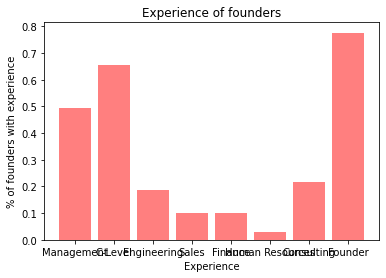

In [47]:
# 
x_axis_exp = experience.keys()
y_axis_exp = experience.values()
plt.bar(x_axis_exp, y_axis_exp, color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Experience")
plt.ylabel("% of founders with experience")
plt.title("Experience of founders")

In [50]:
year_foundation = founders_df["foundation_year"].value_counts()
year_foundation

2015.0    84
2016.0    63
2014.0    60
2019.0    53
2018.0    53
2017.0    52
2020.0    45
2013.0    44
2012.0    35
2011.0    19
2021.0    18
2010.0     9
2008.0     4
2009.0     4
2007.0     2
2002.0     2
2003.0     2
1999.0     2
2004.0     1
1997.0     1
2006.0     1
2001.0     1
Name: foundation_year, dtype: int64

In [53]:
# Plot for foundation_year
x_axis_year = year_foundation.keys()
y_axis_year = year_foundation.values()

TypeError: ignored

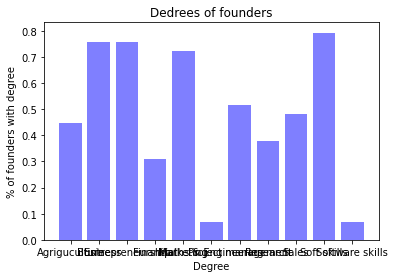

# **Companies**
